# Elnura Nabigazinova MID project

In [62]:
import requests
from bs4 import BeautifulSoup
from functools import reduce
import csv
import pandas as pd
import datetime

**import libraries requests(http library in python to get data from web sites),BeautifulSoup (library which uses for parsing from html or xml files, often used for web scrapping), functools (module for functions that act on or return other functions), csv (module for manipulation on csv files), pandas (python libarary for data analysis, its flexible, fast, easy to use and powerful), datetime (module which useful when work with time)**

In [63]:
host = 'https://tengrinews.kz/'
articles = []

for i in range(1,30):
    page = requests.get(f'{host}read/page/{i}/')
    soup = BeautifulSoup(page.text, 'html.parser')
    articles_soup = soup.find_all(class_='tn-article-item')
    for article_soup in articles_soup:
        title_soup = article_soup.find(class_='tn-article-title')
        if not title_soup:
            continue
        data_soup = article_soup.find(class_='tn-data-list').find_all('li')
        if len(data_soup) != 3:
            continue
        detail_url = article_soup.find('a')['href']
        detail_page = requests.get(host + detail_url)
        detail_soup = BeautifulSoup(detail_page.text, 'html.parser')
        paragraphs = detail_soup.find(class_='tn-news-text').find_all('p')
        size = reduce(lambda x, y: x + y, (map(len, filter(lambda x: x, map(lambda x: x.string, paragraphs)))))
        articles.append((title_soup.string,
                         data_soup[0].find('time').string,
                         getattr(data_soup[2].find('span').find('span'), 'string', None),
                         size))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


**create <u>articles array</u>, for loop where find all articles from site by *class='tn-article-item'* and assign it to *articles_soup* then created another sub loop which select articles titles by *class='tn-article-title'* assigned as *title_soup*. *data soup* is from *class='tn-data-list'* all containing links. If *data soup* lenght no more than 3 create fields *detail_url (which gets 'a' from <u>article_soup</u>), detail_page (which contains <u><a href ="https://tengrinews.kz/">host</a></u> + <u>detail_url</u>), detail_soup (which contains text from <u>detail_page</u> by using BeautifulSoup), paragraphs (selects 'tn-news-text' from <u>detail_soup</u>), size (use reduce from functools), articles add title and date**

In [78]:
print(articles)

[('Кончаловский о фильме "На Луне", мажорах и конфликтах в казахстанском кинематографе', 'сегодня, 09:05', None, 4854), ('"Вчера все покупали тюльпаны, а надо было доллары"', 'сегодня, 08:37', '7', 2340), ('Меры по коронавирусу в нашей стране сильно напоминают показуху', '08 марта 2020, 11:58', '48', 4972), ('Почему заниматься переработкой выгодно и когда в стране исчезнет весь мусор', '05 марта 2020, 11:00', '16', 11963), ('От них уходят мужья, к более домашним - о женщинах в медицине', '04 марта 2020, 10:49', '20', 4895), ('"Сегодня тебя любят, завтра камнями закидают". Альмира Турсын - о роли коучинга в ее жизни', '04 марта 2020, 08:59', '38', 11582), ('Нариман Мукушев: Мы социальное министерство, и обратная связь для нас очень важна', '03 марта 2020, 09:58', '5', 5614), ('"Мы наблюдаем рост казахоязычного контента". Зачем "ВКонтакте" пришла в Казахстан', '02 марта 2020, 09:39', '11', 2509), ('"Получу прибыль и выйду".  Как не стать жертвой финансовой пирамиды', '28 февраля 2020, 09

**print articles array**

In [74]:
with open('articles.csv', mode='w', encoding='utf-8 ', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(('title', 'date', 'comment_count', 'content_size'))
    for article in articles:
        title, date, comment_count, content_size =  article
        title = title.replace('"',"'")
        writer.writerow((title, date, comment_count, content_size))

**Create `articles.csv` file add write into file columns: title, date, comment_count, content_size and rows from <u>articles array</u> in csv format**

In [75]:
df = pd.read_csv('articles.csv')  
df = df.dropna()
df['comment_count'] = df['comment_count'].astype(int)
month_map = {'января': 1, 'февраля': 2, 'марта': 3, 'апреля': 4,
             'мая': 5, 'июня': 6, 'июля': 7, 'августа': 8, 
             'сентября': 9, 'октября': 10, 'ноября': 11, 'декабря': 12}

**Create data frame <u>df</u> which contains data from `articles.csv` and delete rows which does not contain anything by using *dropna* function. Convert comment_count into integer. Create month map where define monthes by numbers**

In [76]:
def str_to_datetime(date_str):
    tmp = date_str.split()
    if len(tmp) != 4:
        return None
    day, month, year, time_str = tmp
    hour, minute = time_str.split(':')
    day = int(day)
    month = month_map[month]
    year = int(year.strip(','))
    hour = int(hour)
    minute = int(minute)
    return datetime.datetime(year, month, day, hour, minute)


**Function *str_to_datetime* converts *day, month, year, hour, minute* into the date time format**

In [77]:
df['date'] = df['date'].apply(str_to_datetime)
df = df.dropna()
df

,title,date,comment_count,content_size
2,Меры по коронавирусу в нашей стране сильно нап...,2020-03-08 11:58:00,48,4972
3,Почему заниматься переработкой выгодно и когда...,2020-03-05 11:00:00,16,11963
4,"От них уходят мужья, к более домашним - о женщ...",2020-03-04 10:49:00,20,4895
5,"'Сегодня тебя любят, завтра камнями закидают'....",2020-03-04 08:59:00,38,11582
6,"Нариман Мукушев: Мы социальное министерство, и...",2020-03-03 09:58:00,5,5614
...,...,...,...,...
550,Квартира за миллион? Ищем варианты дешевого жилья,2019-02-01 12:02:00,3,11346
551,Два стакана чая. Как получить удовольствие от ...,2019-01-30 14:47:00,21,5831
552,'Перейдем на 'ты'?' Где граница между 'ты' и 'вы',2019-01-30 08:45:00,14,4604
553,Почему наша страна получила название 'Казахстан',2019-01-29 08:47:00,69,6398


**apply function *str_to_datetime* on date column on *df* data frame and print updated data frame**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019BAD785388>]],
      dtype=object)

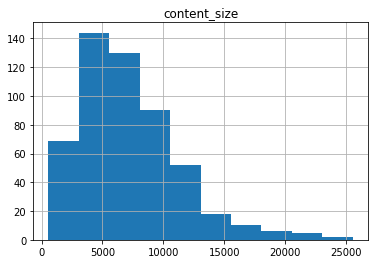

In [70]:
df2 = df.filter(['comment_count','content_size'])
df2.hist(column='content_size')

**Create data frame <i>df2</i> which contains filtered <u>comment_count</u>, <u>content_size</u> from <i>df</i> data frame and draw plot. Plot shows contents size for each comment in news portal**

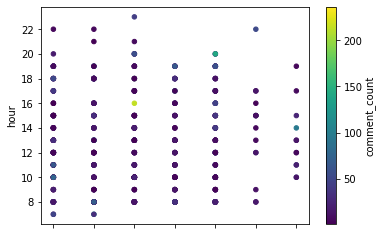

In [71]:
df3 = df.filter(['comment_count'])
df3['week'] = [date.isocalendar()[2] for date in df['date']]
df3['hour'] = [date.hour for date in df['date']]
df3.plot.scatter(x='week',
                 y='hour',
                 c='comment_count',
                 colormap='viridis')

**Create data frame <i>df3</i> which contains filtered <u>comment_count, week, hour</u> from <i>df</i> data frame and draw plot. Plot shows weeks by hours and colored comment_count, which more is green and which is low is purplecolored in plot**